In [38]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
import sweetviz as sv

In [39]:
# import data
df = pd.read_csv('data/kidney_disease.csv')
df.head()
# EDA - print rows and columns
print("Rows:", df.shape[0], "Columns:", df.shape[1])

Rows: 400 Columns: 26


In [40]:
# import data
df = pd.read_csv('data/kidney_disease.csv')
report = sv.analyze(df)
report.show_html("report.html")

                                             |                         | [  0%]   00:00 -> (? left)

/Users/ericdavis/Desktop/anaconda3/lib/python3.12/site-packages/sweetviz/graph.py:33: UserWarning: Glyph 9 (	) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/Users/ericdavis/Desktop/anaconda3/lib/python3.12/site-packages/sweetviz/graph.py:33: UserWarning: Glyph 9 (	) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/Users/ericdavis/Desktop/anaconda3/lib/python3.12/site-packages/sweetviz/graph.py:33: UserWarning: Glyph 9 (	) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/Users/ericdavis/Desktop/anaconda3/lib/python3.12/site-packages/sweetviz/graph.py:33: UserWarning: Glyph 9 (	) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/Users/ericdavis/Desktop/anaconda3/lib/python3.12/site-packages/sweetviz/graph.py:33: UserWarning: Glyph 9 (	) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=T

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 1. Exporatory Data Analysis (EDA)
#### (i) About the whole data structure

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
# EDA - target variable type
print("The column Y is discrete") 
print(df['classification'].value_counts())

The column Y is discrete
classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64


In [5]:
df['classification'] = df['classification'].replace(to_replace={'ckd\t':'ckd', 'notckd': 'not ckd'})
print(df['classification'].value_counts())

classification
ckd        250
not ckd    150
Name: count, dtype: int64


In [6]:
# seperate category columns and numerical columns
num_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane', 'appet', 'sg', 'al', 'su']

# check unique values in categorical columns 
for col in cat_cols:
    print(f"{col} has {df[col].unique()}")

rbc has [nan 'normal' 'abnormal']
pc has ['normal' 'abnormal' nan]
pcc has ['notpresent' 'present' nan]
ba has ['notpresent' 'present' nan]
htn has ['yes' 'no' nan]
dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
cad has ['no' 'yes' '\tno' nan]
pe has ['no' 'yes' nan]
ane has ['no' 'yes' nan]
appet has ['good' 'poor' nan]
sg has [1.02  1.01  1.005 1.015   nan 1.025]
al has [ 1.  4.  2.  3.  0. nan  5.]
su has [ 0.  3.  4.  1. nan  2.  5.]


#### (ii) Then we first take a look at the continuous variables

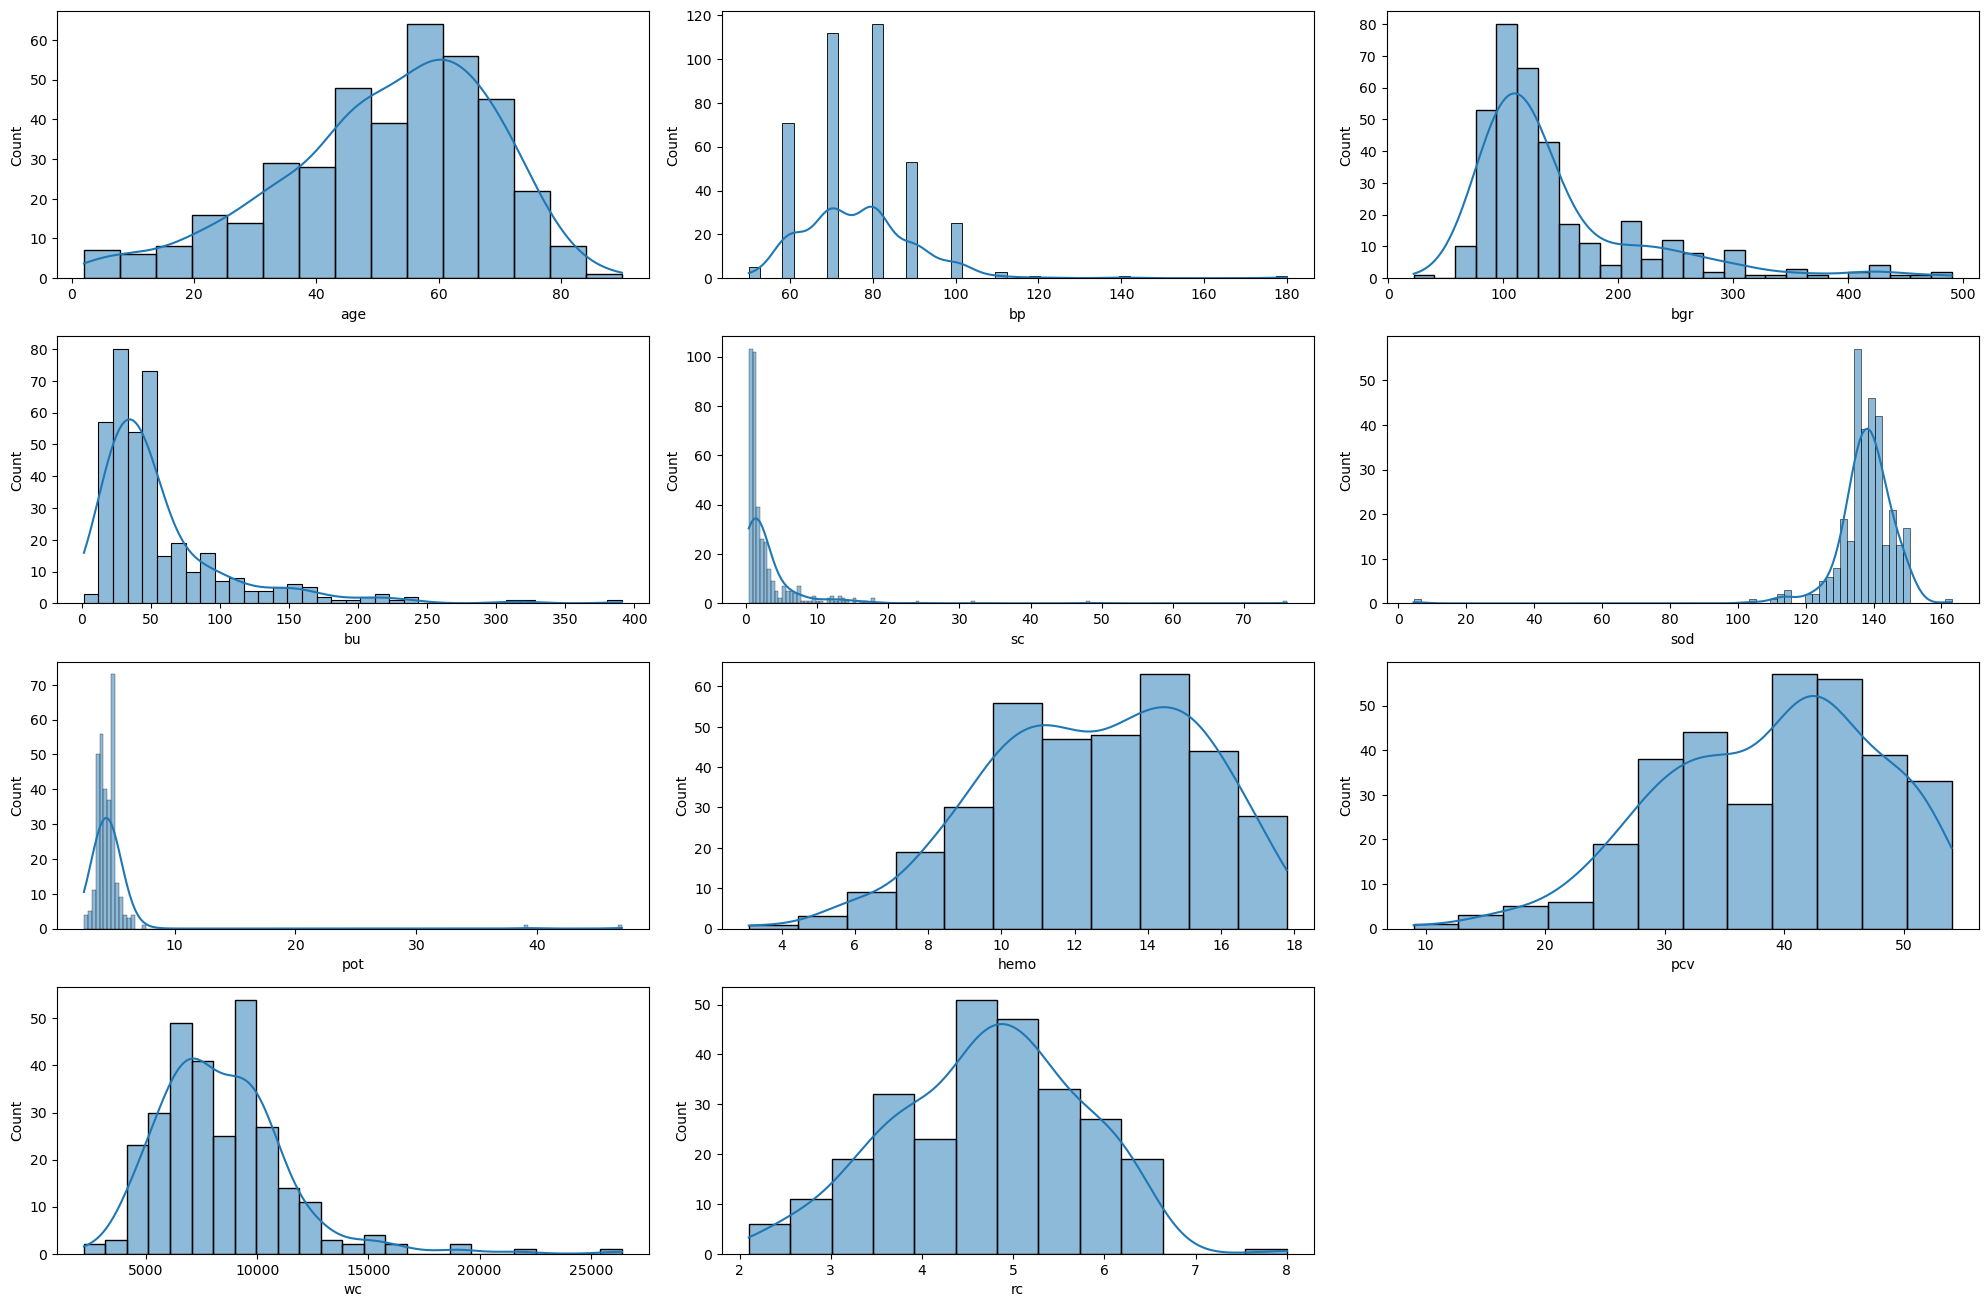

In [7]:
# for the column pcv, wc, rc, there are some strings ? and some values with tab ahead
for column in ['pcv', 'wc', 'rc']:
    df[column] = df[column].str.strip()  # Remove any leading/trailing whitespace
    df[column] = df[column].replace('?',np.nan)
                                    
plt.figure(figsize=(20, 16))
plotnumber = 1

for column in num_cols:
    # Convert to numeric
    df[column] = pd.to_numeric(df[column])
    
    ax = plt.subplot(4, 3, plotnumber)
    sns.histplot(df[column].dropna(), kde=True)  # Use histplot instead of distplot
    plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

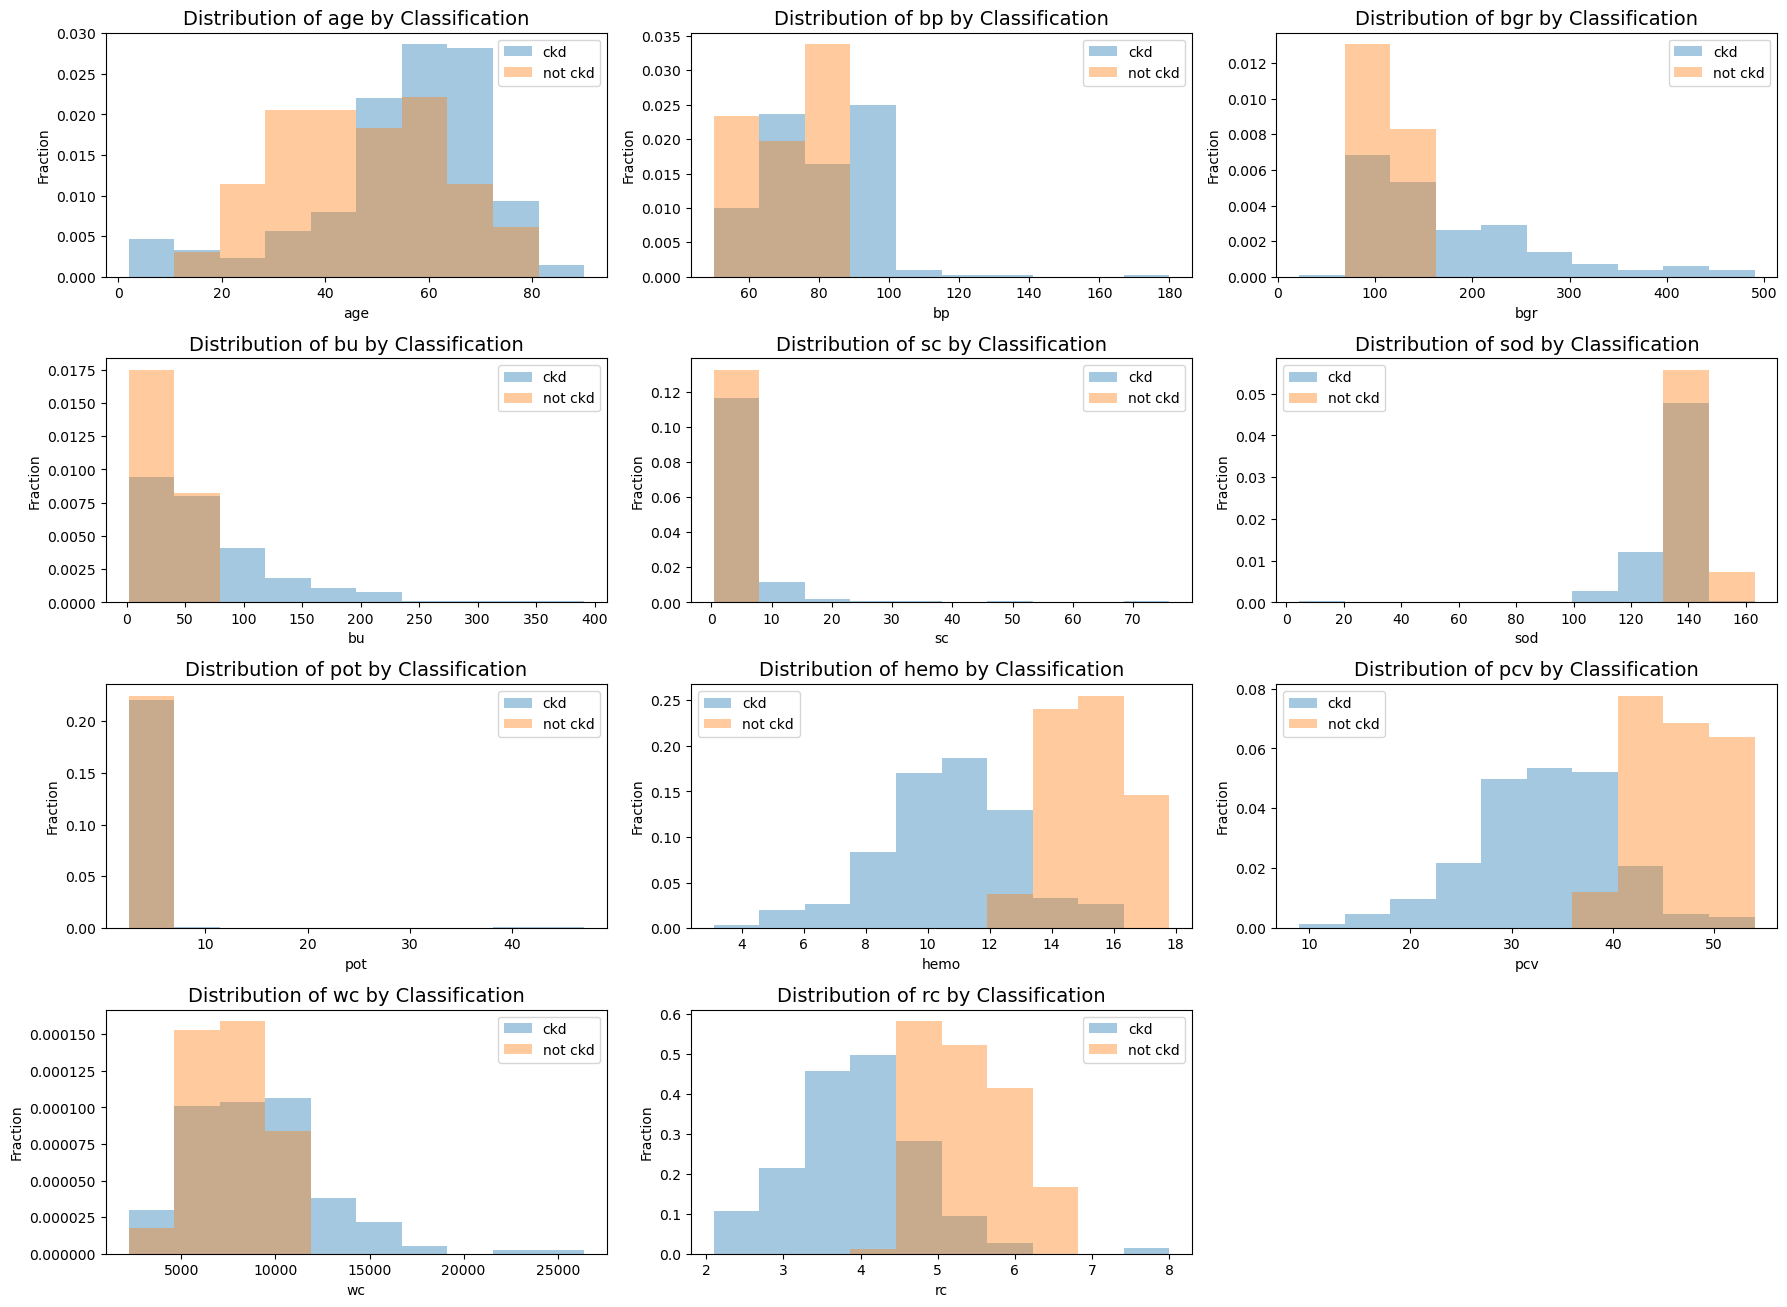

In [8]:
# compare the classification of continous variables
plt.figure(figsize=(18, 16))
categories = df['classification'].unique()

for i, column in enumerate(num_cols):
    plt.subplot(4,3,i+1)  # Create subplots
    bin_range = (df[column].min(), df[column].max())  # Set the bin range for the current column
    
    for c in categories:
        plt.hist(df[df['classification'] == c][column], alpha=0.4, label=c, range = bin_range, density=True)
        plt.legend()
        plt.ylabel('Fraction')
        plt.xlabel(column)
        plt.title(f'Distribution of {column} by Classification', fontsize = 14)

plt.tight_layout()
plt.show()

Now we find that age, bp, bgr, hemo, pcv, wc, rc may have large influence on classification(has disease or not). And we are interested in using bar plot to see if any columns have too many extreme outliers. From above plot, I will choose bgr, bu, wc to investigate.

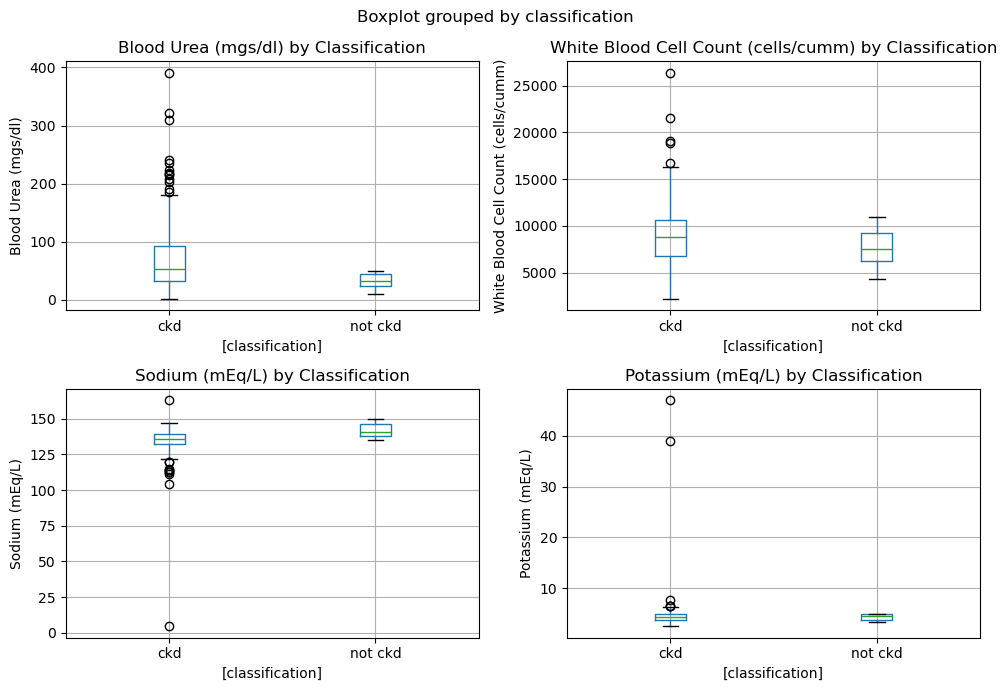

In [22]:
plt.figure(figsize = (10,7))
bar_cols = ['bu', 'wc', 'sod', 'pot']
bar_cols_full = ['Blood Urea (mgs/dl)', 'White Blood Cell Count (cells/cumm)', 'Sodium (mEq/L)', 'Potassium (mEq/L)']
for i, col in enumerate(bar_cols):
    plt.subplot(2,2,i+1)
    df[[col, 'classification']].boxplot(by = 'classification', ax = plt.gca())
    plt.title(f'{bar_cols_full[i]} by Classification')
    plt.ylabel(bar_cols_full[i])

plt.tight_layout()
plt.show()

Next, I am going to visualize some distribution of some attributes across different classidication by violin plot. Here I choose age, hemo, pcv and rc since they have large gap between two distributions from 

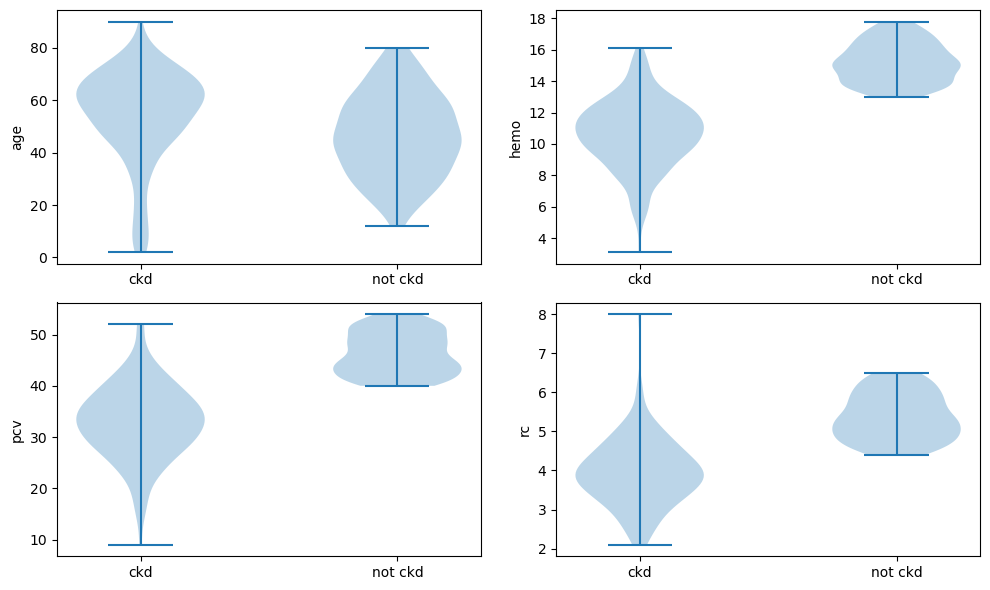

In [24]:
# violin plot
plt.figure(figsize = (10,6))
vio_cols = ['age', 'hemo', 'pcv', 'rc']

for i, col in enumerate(vio_cols):
    plt.subplot(2,2,i+1)
    plt.violinplot(dataset = [df[col][df['classification'] == 'ckd'].dropna().values,
                              df[col][df['classification'] == 'not ckd'].dropna().values]) # dropna to deal with missing values
    plt.xticks([1,2], ['ckd', 'not ckd'])
    plt.ylabel(col)

plt.tight_layout()
plt.show()

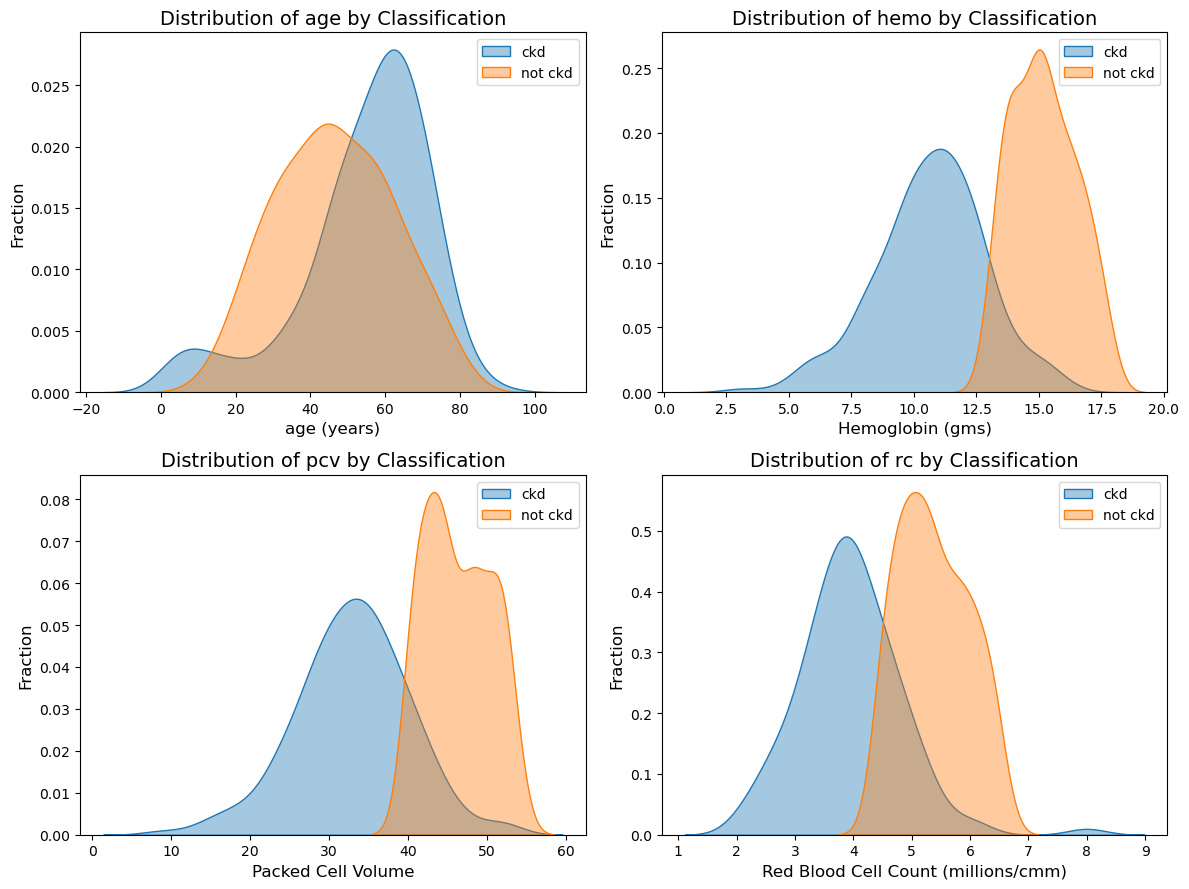

In [27]:
# plot the same attributes using histogram
plt.figure(figsize=(12, 9))
categories = df['classification'].unique()
full_name_cols = ['age (years)', 'Hemoglobin (gms)', 'Packed Cell Volume', 'Red Blood Cell Count (millions/cmm)']
for i, column in enumerate(vio_cols):
    plt.subplot(2,2,i+1) # Create subplots
    
    for c in categories:
        sns.kdeplot(df[df['classification'] == c][column], alpha=0.4, label=c, fill=True)
        plt.legend()
        plt.ylabel('Fraction', fontsize = 12)
        plt.xlabel(full_name_cols[i], fontsize = 12)
        plt.title(f'Distribution of {column} by Classification', fontsize = 14)

plt.tight_layout()
plt.show()

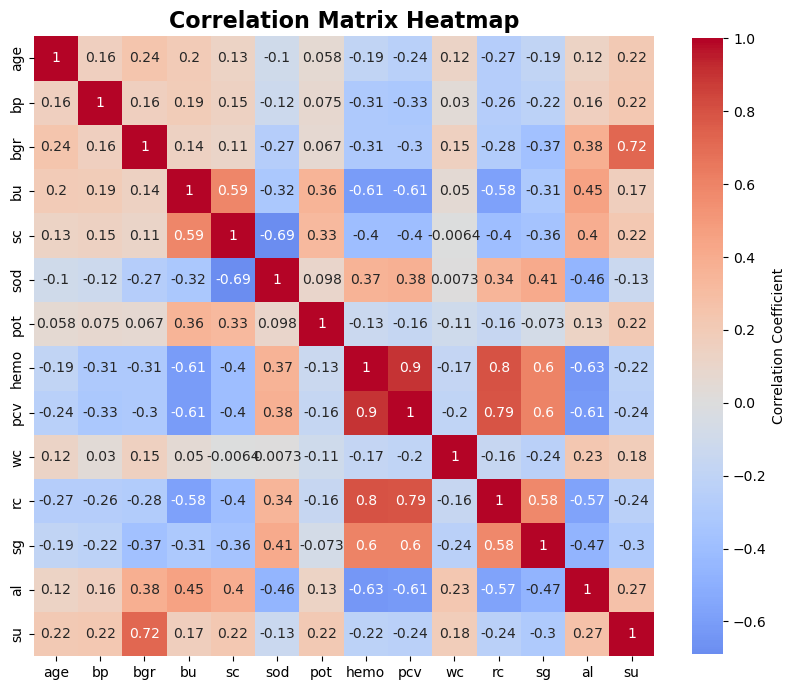

In [12]:
df_corr_nums = df[num_cols].corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr_nums, annot = True, cmap = 'coolwarm', center=0, cbar_kws={'label':'Correlation Coefficient', 'shrink': 0.8}, 
            square=True,  linecolor='black')

plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.show()

we find hemo and pcv have strong correlation relationship, hence we choose to drop one of these attributes -- hemo.

In [28]:
df = df.drop(columns = 'hemo')
num_cols.remove('hemo')

#### (iii) Next we take a look at the categorical variables with no order

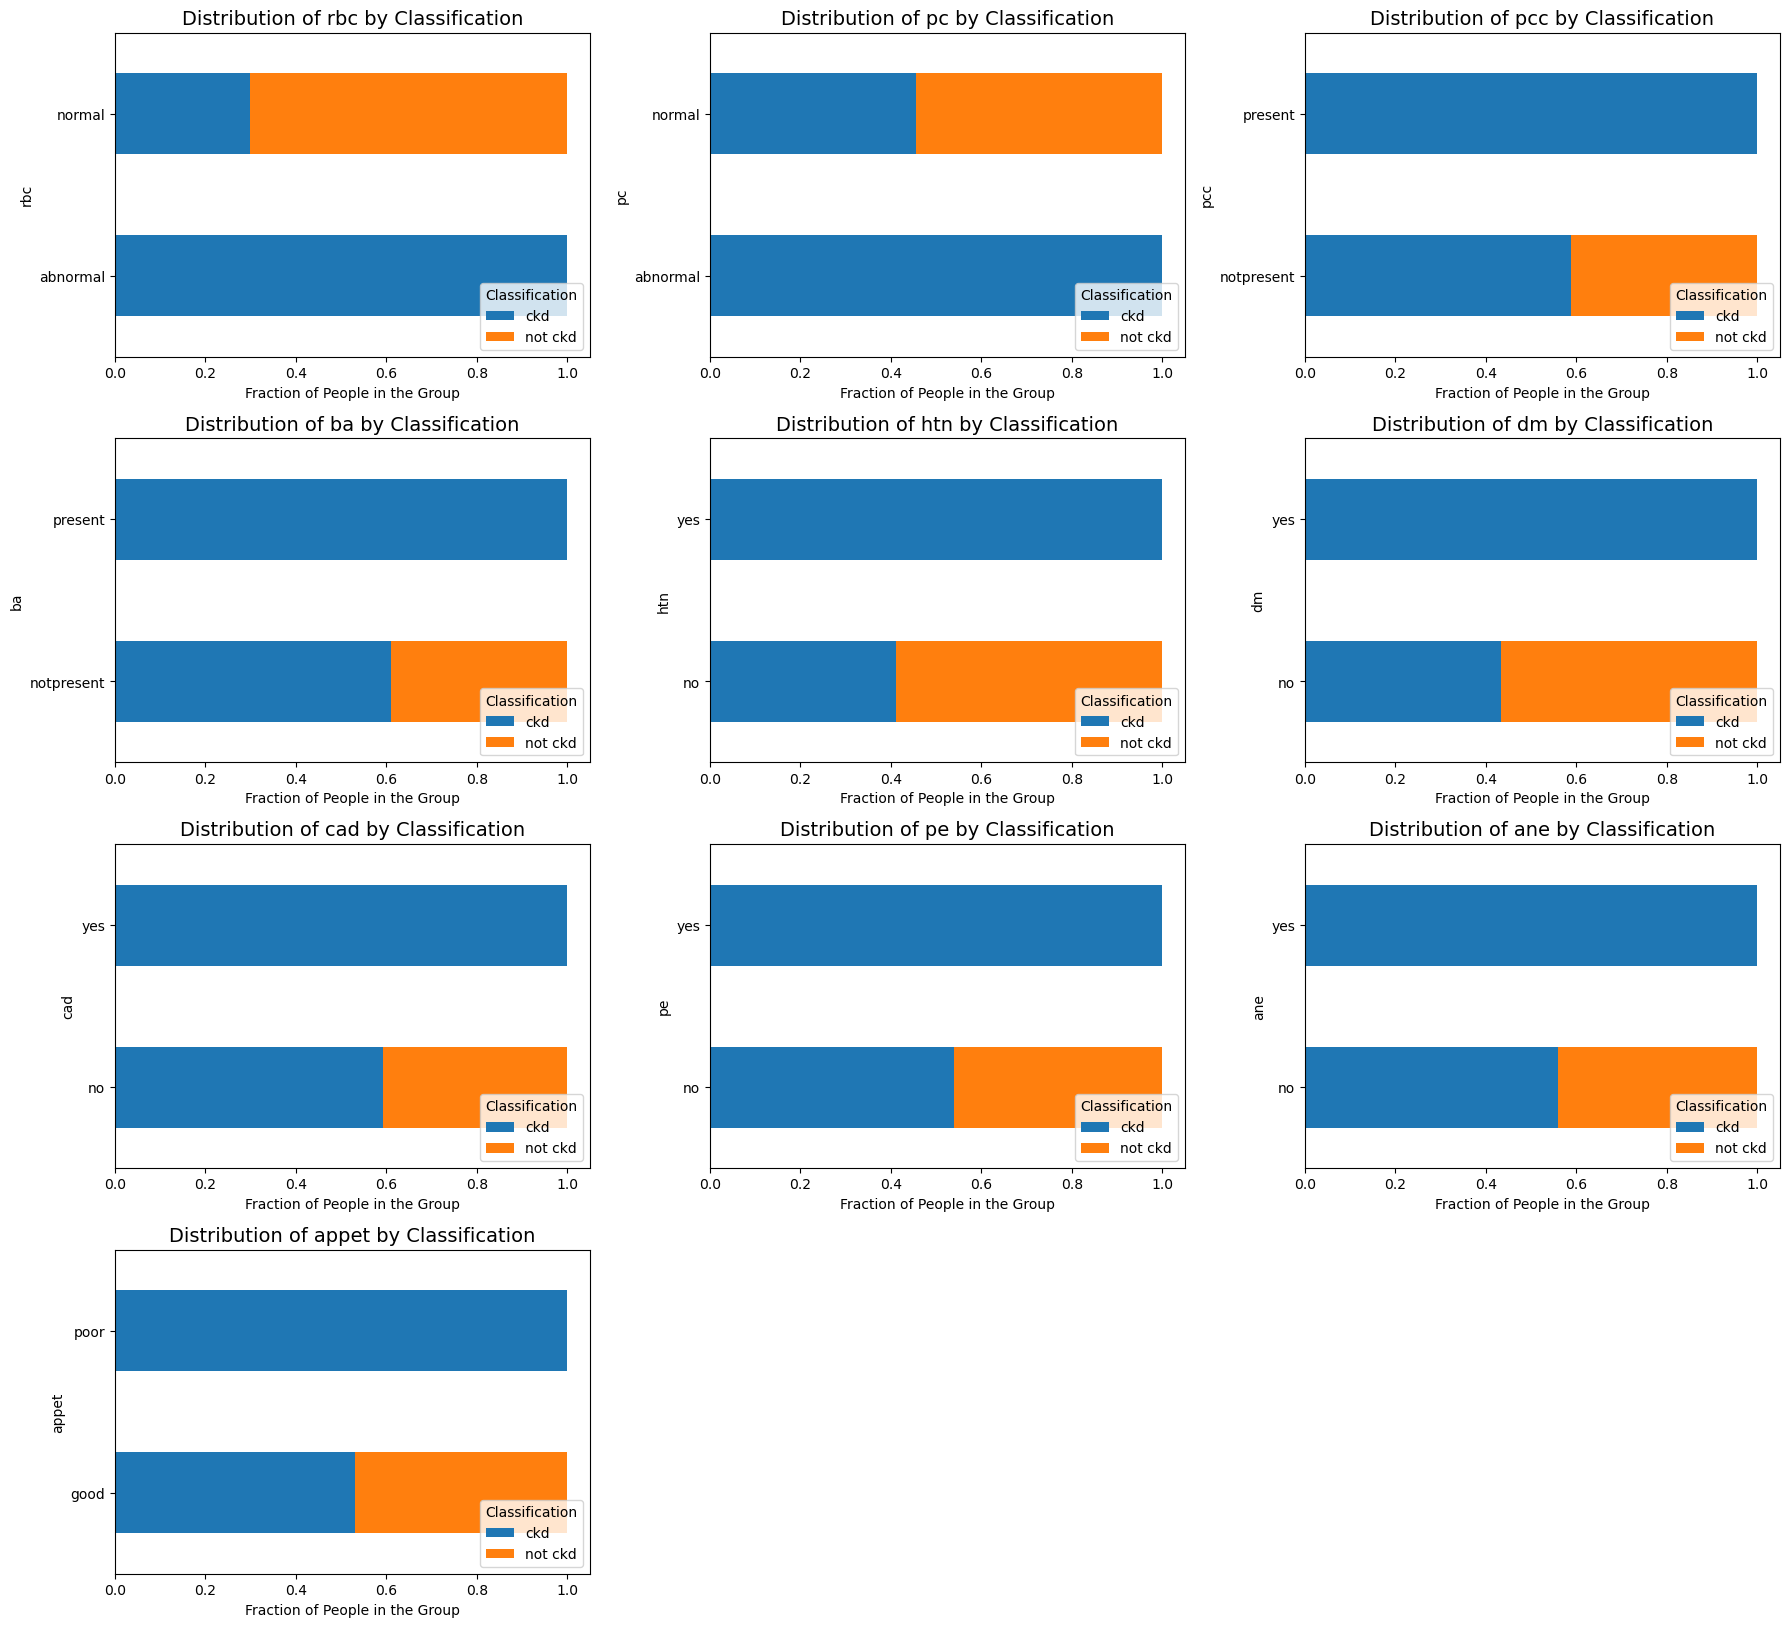

In [30]:
plt.figure(figsize=(18, 20))
categories = df['classification'].unique()
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane', 'appet']

for column in cat_cols:
    df[column] = df[column].str.strip()  # Remove any leading/trailing whitespace
    
for i, column in enumerate(cat_cols):
    plt.subplot(5, 3, i + 1)  # Use dynamic column count
    
    count_matrix = df.groupby([df[column], df['classification']]).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)

    count_matrix_norm.plot(kind='barh', stacked=True, ax = plt.gca())  # Using the current axis

    plt.legend(title='Classification', fontsize=10, loc='lower right')
    plt.xlabel('Fraction of People in the Group')
    plt.title(f'Distribution of {column} by Classification', fontsize = 14)
    
plt.tight_layout()
plt.show()

We can find that all categorical attributes are binary. Also from the above stacked bar plot, we wonder if all not ckd happens in only one of the situation in all the binary attributes.

In [31]:
results = {}
for i in cat_cols:
    uni = df[i].dropna().unique()
    results[i] = [
        round(len(df[(df[i] == uni[0]) & (df['classification'] == 'not ckd')])/len(df[df[i] == uni[0]]),3),
        round(len(df[(df[i] == uni[0]) & (df['classification'] == 'ckd')])/len(df[df[i] == uni[0]]),3),
        round(len(df[(df[i] == uni[1]) & (df['classification'] == 'not ckd')])/len(df[df[i] == uni[1]]),3),
        round(len(df[(df[i] == uni[1]) & (df['classification'] == 'ckd')])/len(df[df[i] == uni[1]]),3)
    ]

pd.DataFrame(results, index = ['notckdS1', 'ckdS1', 'notckdS2', 'ckdS2'])

,rbc,pc,pcc,ba,htn,dm,cad,pe,ane,appet
notckdS1,0.701,0.544,0.412,0.39,0.00,0.000,0.407,0.461,0.44,0.47
ckdS1,0.299,0.456,0.588,0.61,1.00,1.000,0.593,0.539,0.56,0.53
notckdS2,0.000,0.000,0.000,0.00,0.59,0.567,0.000,0.000,0.00,0.00
ckdS2,1.000,1.000,1.000,1.00,0.41,0.433,1.000,1.000,1.00,1.00


#### (iv) Do some summary statistics

In [32]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,pcv,wc,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,54.000000,26400.000000,8.000000


## 2.Split the dataset

In [33]:
random_state = 30
X = df.loc[:, df.columns != 'classification']
y = df['classification']

# use basic split to seperate out the test set
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
i_test = f'[{' '.join(map(str, X_test.index[:3]))} ... {X_test.index[-3]} {X_test.index[-2]} {X_test.index[-1]}]'

# do KFold split on the other
idx = 0 
kf = KFold(n_splits = 5, shuffle = True, random_state = random_state)
for i_train, i_val in kf.split(X_other, y_other):
    idx += 1
    # split for train and val
    X_train, y_train= X_other.iloc[i_train], y_other.iloc[i_train]
    X_val, y_val = X_other.iloc[i_val], y_other.iloc[i_val]
    # get the original index for train and val sets
    ori_i_train = list(X_train.index)
    ori_i_val = list(X_val.index)
    print("-------------------------------------------------------------")
    print(f"test index: {i_test}")
    print(f"train index of {idx}st try [{' '.join(map(str, ori_i_train[:3]))} ... {ori_i_train[-3]} {ori_i_train[-2]} {ori_i_train[-1]}]")
    print(f"validation index of {idx}st try [{' '.join(map(str, ori_i_val[:3]))} ... {ori_i_val[-3]} {ori_i_val[-2]} {ori_i_val[-1]}]")

print("-------------------------------------------------------------")
print(f"test shape {X_test.shape},{y_test.shape}")
print(f"train shape {X_train.shape}, {y_train.shape}")
print(f"validation shape {X_val.shape}, {y_val.shape}")

-------------------------------------------------------------
test index: [35 316 281 ... 118 272 365]
train index of 1st try [313 222 398 ... 140 301 293]
validation index of 1st try [21 350 146 ... 173 131 309]
-------------------------------------------------------------
test index: [35 316 281 ... 118 272 365]
train index of 2st try [313 21 222 ... 386 140 293]
validation index of 2st try [255 59 17 ... 177 263 301]
-------------------------------------------------------------
test index: [35 316 281 ... 118 272 365]
train index of 3st try [21 350 255 ... 309 386 301]
validation index of 3st try [313 222 398 ... 145 140 293]
-------------------------------------------------------------
test index: [35 316 281 ... 118 272 365]
train index of 4st try [313 21 222 ... 140 301 293]
validation index of 4st try [366 126 336 ... 358 396 375]
-------------------------------------------------------------
test index: [35 316 281 ... 118 272 365]
train index of 5st try [313 21 222 ... 140 301 

### 3. Preprocess the dataset

In [19]:
# Before preprocessing, we have 26 features and 400 data points
df.shape

(400, 25)

#### (i) check the missing values percentage for each attribute

In [36]:
df[num_cols].isnull().sum()/len(df)

age    0.0225
bp     0.0300
bgr    0.1100
bu     0.0475
sc     0.0425
sod    0.2175
pot    0.2200
pcv    0.1775
wc     0.2650
rc     0.3275
sg     0.1175
al     0.1150
su     0.1225
dtype: float64

In [37]:
df[cat_cols].isnull().sum()/len(df)

rbc      0.3800
pc       0.1625
pcc      0.0100
ba       0.0100
htn      0.0050
dm       0.0050
cad      0.0050
pe       0.0025
ane      0.0025
appet    0.0025
dtype: float64

In [38]:
df['classification'].isnull().sum()/len(df) # the target variable doesn't contain missing values!

0.0

We can find the target variable doesn't contain missing values. And all attributes contain some missing values. And for the category variables, we can treat the missing values as another category. 

In [39]:
for i in cat_cols:
    print(X_train[i].unique())

['normal' nan 'abnormal']
['normal' nan 'abnormal']
['notpresent' 'present' nan]
['notpresent' 'present' nan]
['no' 'yes' nan]
['no' 'yes' nan]
['no' 'yes' nan]
['no' 'yes' nan]
['no' 'yes' nan]
['good' 'poor' nan]


In [40]:
# replace nan with string
for i in cat_cols:
    X_train.loc[:,i] = X_train[i].replace(to_replace = {np.nan:'missing'})

for i in cat_cols:
    print(X_train[i].unique())

['normal' 'missing' 'abnormal']
['normal' 'missing' 'abnormal']
['notpresent' 'present' 'missing']
['notpresent' 'present' 'missing']
['no' 'yes' 'missing']
['no' 'yes' 'missing']
['no' 'yes' 'missing']
['no' 'yes' 'missing']
['no' 'yes' 'missing']
['good' 'poor' 'missing']


#### (ii) apply encoder

In [36]:
cat_cols_noorder = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane', 'appet']
cat_cols_withorder = ['sg', 'al', 'su']

# for the categorical variables with no order - OneHotEncoder 
colnames = []
for i in cat_cols_noorder:
    temp = [f'{i}_{value}' for value in X_train[i].unique()]
    colnames.extend(temp)
    
enc = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
X_train_pre_cat1 = pd.DataFrame(enc.fit_transform(X_train[cat_cols_noorder]), columns = colnames)
X_test_pre_cat1 = pd.DataFrame(enc.transform(X_test[cat_cols_noorder]), columns = colnames)
X_val_pre_cat1 = pd.DataFrame(enc.transform(X_val[cat_cols_noorder]), columns = colnames)

# for the categorical variables with order - OrdinalEncoder
ordinal_cats = [[1.005,1.010,1.015,1.020,1.025,np.nan], [0,1,2,3,4,5,np.nan], [0,1,2,3,4,5,np.nan]]
enc = OrdinalEncoder(categories = ordinal_cats)
X_train_pre_cat2 = pd.DataFrame(enc.fit_transform(X_train[cat_cols_withorder]))
X_test_pre_cat2 = pd.DataFrame(enc.transform(X_test[cat_cols_withorder]))
X_val_pre_cat2 = pd.DataFrame(enc.transform(X_val[cat_cols_withorder]))

# for the continous variables - use standard scalar
scaler = StandardScaler()
X_train_pre_num = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns = num_cols)
X_test_pre_num = pd.DataFrame(scaler.transform(X_test[num_cols]), columns = num_cols)
X_val_pre_num = pd.DataFrame(scaler.transform(X_val[num_cols]), columns = num_cols)

# merge the table 
X_train = pd.concat([X_train_pre_num, X_train_pre_cat1, X_train_pre_cat2], axis = 1)
X_test = pd.concat([X_test_pre_num, X_test_pre_cat1, X_train_pre_cat2], axis = 1)
X_val = pd.concat([X_val_pre_num, X_val_pre_cat1, X_train_pre_cat2], axis = 1)

In [37]:
print(X_train.shape, X_val.shape, X_test.shape)
X_train.head()

(256, 43) (256, 43) (256, 43)


,age,bp,bgr,bu,sc,sod,pot,pcv,wc,rc,...,pe_nan,ane_no,ane_yes,ane_nan,appet_good,appet_poor,appet_nan,0,1,2
0,0.194089,0.271292,-0.588274,-0.583190,-0.378295,0.394177,0.003552,1.434432,-0.120453,0.129036,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
1,0.479179,0.970497,NaN,2.232910,11.838900,-11.160709,NaN,-0.731341,-0.778108,-1.015461,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
2,1.277431,-1.127120,-0.536287,0.157889,-0.231884,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
3,0.764269,-0.427914,-0.835211,-0.731405,-0.362027,0.394177,0.003552,0.459834,0.339906,-0.157088,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0
4,-1.972594,-1.127120,-0.458307,-0.175596,-0.362027,-0.194072,0.029047,1.326143,-0.449281,1.178159,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0


Now the data has 43 features and still 400 data points.